### Exercise 1: 

Build a regression model and see that it recovers the true values of the Bs. 

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns; sns.set()

from sklearn.metrics import mean_squared_error

In [2]:
# simulate a fake normal distribution values with given mean and standard deviation
mean, stdDev = 5, 7
x_1 = np.random.normal(5, 7, 1000)

trueError = np.random.normal(0, 2, 1000)
trueBeta0 = 1.1 # assumption
trueBeta1 = -8.2 # assumption

y = trueBeta0 + trueBeta1 * x_1 + trueError

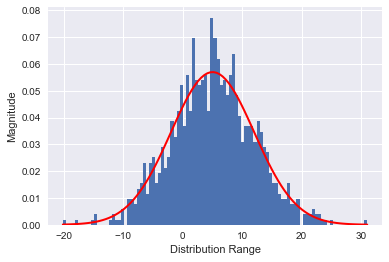

In [3]:
# plot x_1 distribution
binEdges = np.linspace(min(x_1), max(x_1), 100)
plt.hist(x_1, bins=binEdges, normed=True)
p = mlab.normpdf(binEdges, mean, stdDev)
plt.plot(binEdges, p, 'r', linewidth=2)
plt.xlabel('Distribution Range')
plt.ylabel('Magnitude')
plt.show()

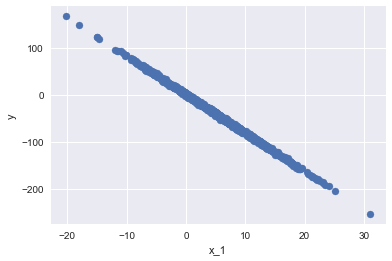

In [4]:
# plot x_1, y values to see the distribution
plt.scatter(x_1, y)
plt.xlabel('x_1')
plt.ylabel('y')
plt.show()

In [5]:
# fit a linear regression model with one variable x_1
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(x_1[:, np.newaxis], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

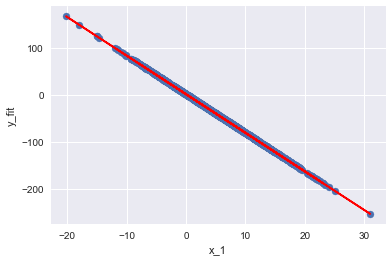

In [6]:
# use the model fit for predicting y values for radom x values
yfit = model.predict(x_1[:, np.newaxis])

# plot the linear regression line 
plt.scatter(x_1, yfit)
plt.plot(x_1, yfit, color='r')
plt.xlabel('x_1')
plt.ylabel('y_fit')
plt.show()

In [7]:
# calculate mean square error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, yfit)
print ('Mean Squared Error:', mse)

Mean Squared Error: 3.97154285465


### Exercise 2: 

Simulate another fake variable x_2 that has a Gamma distribution with parameters you pick. Now make the truth be that y is a linear combination of both x_1 and x_2. Fit a model that only depends on . Fit a model that only depends on x_1. Fit a model that uses both. Vary the sample size and make a plot of mean square error of the training set and of the test set versus sample size.

In [8]:
# simulate x_2 variable with gamma distributed values
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
x_2 = np.random.gamma(shape, scale, 1000)

In [9]:
# calculating y value
trueBeta2=1 # assumption
y = trueBeta0 + trueBeta1 * x_1 + trueBeta2 * x_2 + trueError

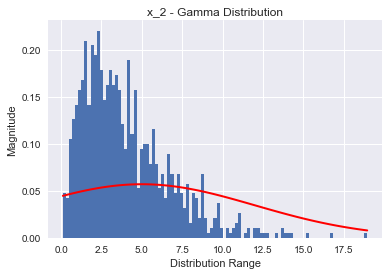

In [10]:
# plot x_2 distribution
binEdges = np.linspace(min(x_2), max(x_2), 100)
plt.hist(x_2, bins=binEdges, normed=True)
p = mlab.normpdf(binEdges, mean, stdDev)
plt.plot(binEdges, p, 'r', linewidth=2)
plt.title('x_2 - Gamma Distribution')
plt.xlabel('Distribution Range')
plt.ylabel('Magnitude')
plt.show()

#### model using x_1 as independent variable

In [11]:
X = x_1[:, np.newaxis]
print ('Shape of X:', X.shape)

# use the model fit for predicting y values for random x values
model.fit(X, y)
yfit = model.predict(X)

# calculate mean square error
mse_x1 = mean_squared_error(y, yfit)
print ('Mean Squared Error:', mse_x1)

Shape of X: (1000, 1)
Mean Squared Error: 11.7684616


#### model using x_2 as independent variable

In [12]:
X = x_2[:, np.newaxis]
print ('Shape of X:', X.shape)

# use the model fit for predicting y values for random x values
model.fit(X, y)
yfit = model.predict(X)

# calculate mean square error
mse_x2 = mean_squared_error(y, yfit)
print ('Mean Squared Error:', mse_x2)

Shape of X: (1000, 1)
Mean Squared Error: 3184.76473216


#### model using both x_1 & x_2 as independent variables

In [13]:
X = np.column_stack((x_1, x_2))
print ('Shape of X:', X.shape)

# use the model fit for predicting y values for random x values
model.fit(X, y)
yfit = model.predict(X)

# calculate mean square error
mse_both = mean_squared_error(y, yfit)
print ('Mean Squared Error:', mse_both)

Shape of X: (1000, 2)
Mean Squared Error: 3.9653776821


#### MSE evaluation between test & training datasets with sample size 0.66 / 0.33

In [14]:
# divide the datataset created with 2 variables into training & test samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# use X_train, y_train to train the model and X_test to predict values
model.fit(X_train, y_train)

# predict y_train, y_test values from model created 
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

# calculate mean square error for training dataset
mse_train_1 = mean_squared_error(y_train, y_train_predicted)
print ('Mean Squared Error - Train:', mse_train_1)

# calculate mean square error for test dataset
mse_test_1 = mean_squared_error(y_test, y_test_predicted)
print ('Mean Squared Error - Test:', mse_test_1)

Mean Squared Error - Train: 4.06608404988
Mean Squared Error - Test: 3.77799637377


#### MSE evaluation between test & training datasets with sample size 0.75 / 0.25

In [15]:
# divide the datataset created with 2 variables into training & test samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# use X_train, y_train to train the model and X_test to predict values
model.fit(X_train, y_train)

# predict y_train, y_test values from model created 
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

# calculate mean square error for training dataset
mse_train_2 = mean_squared_error(y_train, y_train_predicted)
print ('Mean Squared Error - Train:', mse_train_2)

# calculate mean square error for test dataset
mse_test_2 = mean_squared_error(y_test, y_test_predicted)
print ('Mean Squared Error - Test:', mse_test_2)

Mean Squared Error - Train: 4.14708217699
Mean Squared Error - Test: 3.43226830791


#### MSE evaluation between test & training datasets with sample size 0.85 / 0.15

In [16]:
# divide the datataset created with 2 variables into training & test samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# use X_train, y_train to train the model and X_test to predict values
model.fit(X_train, y_train)

# predict y_train, y_test values from model created 
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

# calculate mean square error for training dataset
mse_train_3 = mean_squared_error(y_train, y_train_predicted)
print ('Mean Squared Error - Train:', mse_train_3)

# calculate mean square error for test dataset
mse_test_3 = mean_squared_error(y_test, y_test_predicted)
print ('Mean Squared Error - Test:', mse_test_3)

Mean Squared Error - Train: 4.03130561757
Mean Squared Error - Test: 3.61474081759


#### plot MSE results of test and training datasets

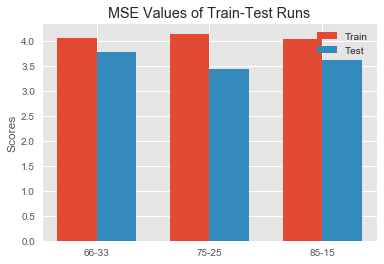

In [17]:
plt.style.use('ggplot')

mseTrain = (mse_train_1, mse_train_2, mse_train_3)
mseTest = (mse_test_1, mse_test_2, mse_test_3)

N =3
ind = np.arange(N) 
width = 0.35       
plt.bar(ind, mseTrain, width, label='Train')
plt.bar(ind + width, mseTest, width, label='Test')

plt.xticks(ind + width / 2, ('66-33', '75-25', '85-15'))
plt.legend(loc='best')
plt.ylabel('Scores')
plt.title('MSE Values of Train-Test Runs')
plt.show()

### Exercise 3

Create a new variable, Z, that is equal to x_1^2. Include this as one of the predictors in your model. See what happens when you fit a model that depends on x_1 only and then also on Z. Vary the sample size and make a plot of mean square error of the training set and of the test set versus sample size. 

In [18]:
y = trueBeta0 + trueBeta1 * x_1 + trueError

#### modeling using x_1 alone

In [19]:
X = x_1[:, np.newaxis]

# use the model fit for predicting y values for random x values
model.fit(X, y)
yfit = model.predict(X)

# calculate mean square error
mse_x1 = mean_squared_error(y, yfit)
print ('Mean Squared Error:', mse_x1)

Mean Squared Error: 3.97154285465


#### modeling using x_1 and x_1^2

In [20]:
y = trueBeta0 + trueBeta1 * x_1 + trueBeta2 * x_1 * x_1 + trueError

In [21]:
X = np.column_stack((x_1, x_1 * x_1))
print ('Shape of X:', X.shape)

# use the model fit for predicting y values for random x values
model.fit(X, y)
yfit = model.predict(X)

# calculate mean square error
mse = mean_squared_error(y, yfit)
print ('Mean Squared Error:', mse)

Shape of X: (1000, 2)
Mean Squared Error: 3.96998519456


#### MSE evaluation between test & training datasets with sample size 0.66 / 0.33

In [22]:
# divide the datataset created with 2 variables into training & test samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# use X_train, y_train to train the model and X_test to predict values
model.fit(X_train, y_train)

# predict y_train, y_test values from model created 
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

# calculate mean square error for training dataset
mse_train_1 = mean_squared_error(y_train, y_train_predicted)
print ('Mean Squared Error - Train:', mse_train_1)

# calculate mean square error for test dataset
mse_test_1 = mean_squared_error(y_test, y_test_predicted)
print ('Mean Squared Error - Test:', mse_test_1)

Mean Squared Error - Train: 4.06577726592
Mean Squared Error - Test: 3.78481081047


#### MSE evaluation between test & training datasets with sample size 0.75 / 0.25

In [23]:
# divide the datataset created with 2 variables into training & test samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# use X_train, y_train to train the model and X_test to predict values
model.fit(X_train, y_train)

# predict y_train, y_test values from model created 
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

# calculate mean square error for training dataset
mse_train_2 = mean_squared_error(y_train, y_train_predicted)
print ('Mean Squared Error - Train:', mse_train_2)

# calculate mean square error for test dataset
mse_test_2 = mean_squared_error(y_test, y_test_predicted)
print ('Mean Squared Error - Test:', mse_test_2)

Mean Squared Error - Train: 4.14832255615
Mean Squared Error - Test: 3.4437542404


#### MSE evaluation between test & training datasets with sample size 0.85 / 0.15

In [24]:
# divide the datataset created with 2 variables into training & test samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# use X_train, y_train to train the model and X_test to predict values
model.fit(X_train, y_train)

# predict y_train, y_test values from model created 
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

# calculate mean square error for training dataset
mse_train_3 = mean_squared_error(y_train, y_train_predicted)
print ('Mean Squared Error - Train:', mse_train_3)

# calculate mean square error for test dataset
mse_test_3 = mean_squared_error(y_test, y_test_predicted)
print ('Mean Squared Error - Test:', mse_test_3)

Mean Squared Error - Train: 4.03088128856
Mean Squared Error - Test: 3.63920990409


#### plot MSE results of test and training datasets

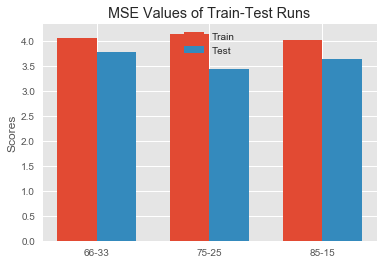

In [25]:
plt.style.use('ggplot')

mseTrain = (mse_train_1, mse_train_2, mse_train_3)
mseTest = (mse_test_1, mse_test_2, mse_test_3)

N =3
ind = np.arange(N) 
width = 0.35       
plt.bar(ind, mseTrain, width, label='Train')
plt.bar(ind + width, mseTest, width, label='Test')

plt.xticks(ind + width / 2, ('66-33', '75-25', '85-15'))
plt.legend(loc='best')
plt.ylabel('Scores')
plt.title('MSE Values of Train-Test Runs')
plt.show()

### Exercise 4

Play around more by (a) changing parameter values (the true Bs), (b) changing the distribution of the true error, and (c) including more predictors in the model with other kinds of probability distributions. (rnorm() means randomly generate values from a normal distribution. rbinom() does the same for binomial. So look up these functions online and try to find more.) 

In [26]:
# simulate a fake normal distribution values with given mean and standard deviation
mean, stdDev = 5, 7
x_1 = np.random.normal(5, 7, 1000)

# interchange the trueBeta0, 1 values 
trueBeta0 = -8.2 # assumption
trueBeta1 = 1.1 # assumption

# add one more predictor variable using random binomial distribution 
n, p = 10, .5  # number of trials, probability of each trial
x_2 = np.random.binomial(n, p, 1000)

# trueError calculate using normal distributed values.
trueError = np.random.normal(0, 2, 1000)

y = trueBeta0 + trueBeta1 * x_1 + trueBeta2 * x_2 + trueError

In [27]:
X = x_1[:, np.newaxis]

# use the model fit for predicting y values for random x values
model.fit(X, y)
yfit = model.predict(X)

# calculate mean square error
mse_x1 = mean_squared_error(y, yfit)
print ('Mean Squared Error:', mse_x1)

Mean Squared Error: 6.13752738671


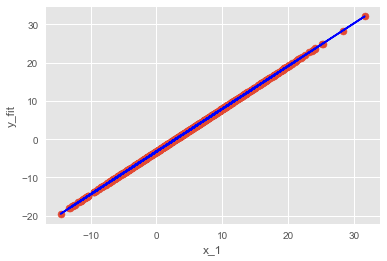

In [28]:
# plot the linear regression line 
plt.scatter(x_1, yfit)
plt.plot(x_1, yfit, color='b')
plt.xlabel('x_1')
plt.ylabel('y_fit')
plt.show()